In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


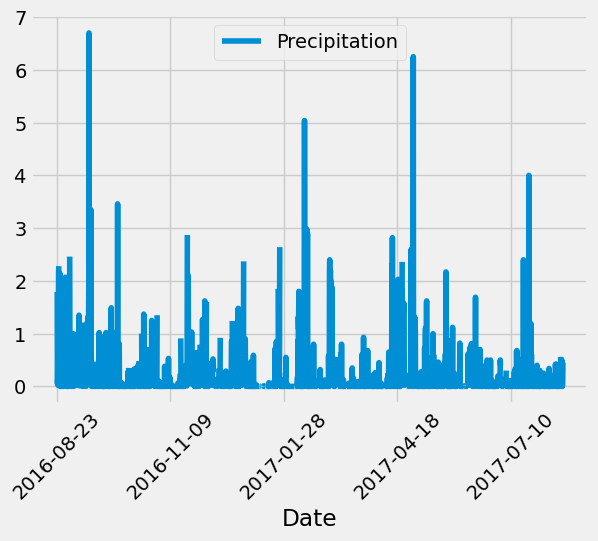

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
year_ago
# Perform a query to retrieve the data and precipitation scores

last_12_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >=year_ago).filter(Measurement.date <='2017-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_data_df = pd.DataFrame(last_12_precip, columns = ['Date','Precipitation']).sort_values("Date",ascending=True)
precip_data_df.set_index(precip_data_df['Date'], inplace = True)

# Sort the dataframe by date
precip_data_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
precip_data_df.plot(rot=45)
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data_df.describe()

Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(Measurement.station.distinct()).count()
num_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
most_active_stations = session.query(Measurement.station).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active_stations

('USC00519281',)

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_report = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                                   filter(Measurement.station == 'USC00519281').all()
most_active_report

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Temp Frequency: USC00519281 (2016/08/23-2017/08/23)')

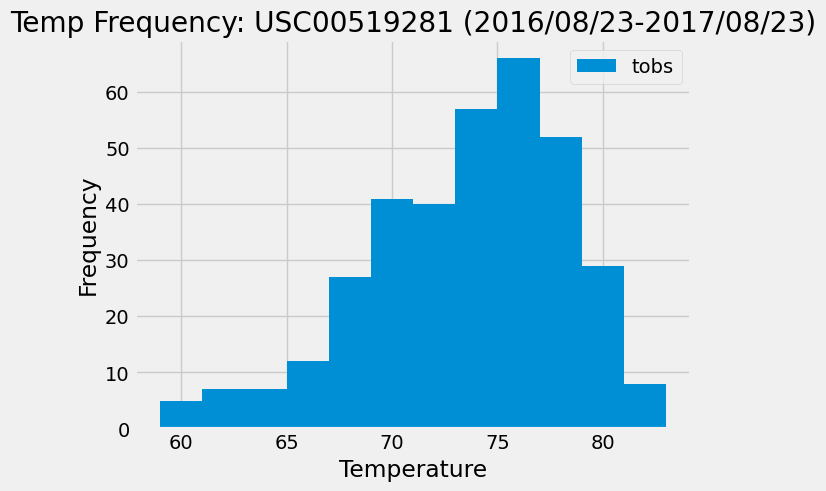

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date > year_ago).all()
tobs_df = pd.DataFrame(tobs_data, columns = ["tobs"])
tobs_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('Temp Frequency: USC00519281 (2016/08/23-2017/08/23)')

# Close Session

In [30]:
# Close Session
session.close()